In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
import random

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
#tenseflow is a platform where we traing the model
#like neuron system means layer by layer hr ek ko milte h 
#conv2d=image is 2d thts why we use it,they use mapping and with this they detct t the edge of the image they compare the edge 
# Maxpooling they reduceee it and they take only usefull feature other they reduce and by this reduce the computatty complexcity
# dense=thy take all the backward data and gives output and the o/p is from all the backward data
#flatten=convert 2d to 1d
#keras=api that is used in detecting the image

LOAD DATASET

In [5]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')
X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')


In [16]:
print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test: ", Y_test.shape)

shape of X_train:  (2000, 100, 100, 3)
shape of Y_train:  (2000, 1)
shape of X_test:  (400, 100, 100, 3)
shape of Y_test:  (400, 1)


In [7]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test =  X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0


In [8]:
print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test: ", Y_test.shape)

shape of X_train:  (2000, 100, 100, 3)
shape of Y_train:  (2000, 1)
shape of X_test:  (400, 100, 100, 3)
shape of Y_test:  (400, 1)


In [9]:
X_train[1, :]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

MODEL

APPROACH 1

In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


APPROACH 2

In [11]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


keras => optimizer, losses, metrics

In [12]:
# looses= diff. btwn predicted and actual value
# metrics to analyis the model 
# if we have binary classification such that 


Binary classification= losses = Crossentropy ya to cat ya to dog
Metrics = to detect the performance oof the model
losss=inp  b  hh opt v h pr op kossh or aa rha tb loss funct use krege
if we have equal label predictionmeasure=Metricsss =accuracy
optimiser= when we have to reduce the error rate of the model
optimization algo=Adam(Adaptive Moment Estimation)

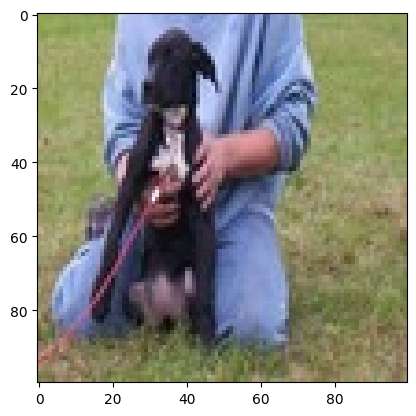

'idx = random.randint(0, len(X_train))\nprint(idx)\nplt.imshow(X_train[idx, :])\nplt.show()'

In [12]:
idx=random.randint(0,len(X_train))
#print(idx)
plt.imshow(X_train[idx,:])
plt.show()
'''idx = random.randint(0, len(X_train))
print(idx)
plt.imshow(X_train[idx, :])
plt.show()'''

In [13]:
#opt=keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.fit(X_train,Y_train,epochs=6,batch_size=64)

Epoch 1/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 263ms/step - accuracy: 0.5183 - loss: 0.7772
Epoch 2/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 250ms/step - accuracy: 0.5854 - loss: 0.6815
Epoch 3/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 255ms/step - accuracy: 0.6403 - loss: 0.6392
Epoch 4/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 255ms/step - accuracy: 0.7134 - loss: 0.5726
Epoch 5/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.7554 - loss: 0.5027
Epoch 6/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 248ms/step - accuracy: 0.7958 - loss: 0.4563


In [11]:
# epocks=book shoro se last tk read kr lea to vo ek epose hogyea
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.7562 - loss: 0.6784


[0.6942732930183411, 0.5099999904632568]

In [20]:
# if testdata size incr. then accuracy inc.

Markdown preedictions

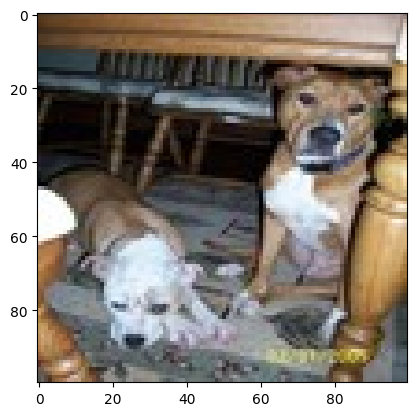

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Our model it is a :  dog


In [12]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2 ,:])
plt.show()
y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5
if(y_pred==0):
    pred='dog'
else:
    pred='cat'
print('Our model it is a : ',pred)